In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# Read data from multiple sources and concatenate data frames
df_test = pd.read_csv('downloads/test.csv.zip')
df_train=pd.read_csv('downloads/train.csv.zip')

delivery = pd.concat([df_test,df_train],ignore_index=True)

In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  object 
 3   Delivery_person_Ratings      56992 non-null  object 
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  56992 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56992 non-null  object 
 12  Road_traffic_density         56992 non-null  object 
 13  Vehicle_conditio

In [4]:
# Check for missing values
missing_values = delivery.isnull().sum()

# Calculate missing value counts
missing_values = pd.DataFrame(missing_values[missing_values > 0])

# Calculate missing percent of values for each column
missing_pct = ((missing_values/delivery.shape[0]*100).round(3))

# Add missing count and percent to table
missing_values["% Missing"] = missing_pct
missing_values.rename(columns={0: 'Count Missing'}, inplace=True)
missing_values

,Count Missing,% Missing
Time_taken(min),11399,20.001


<Axes: >

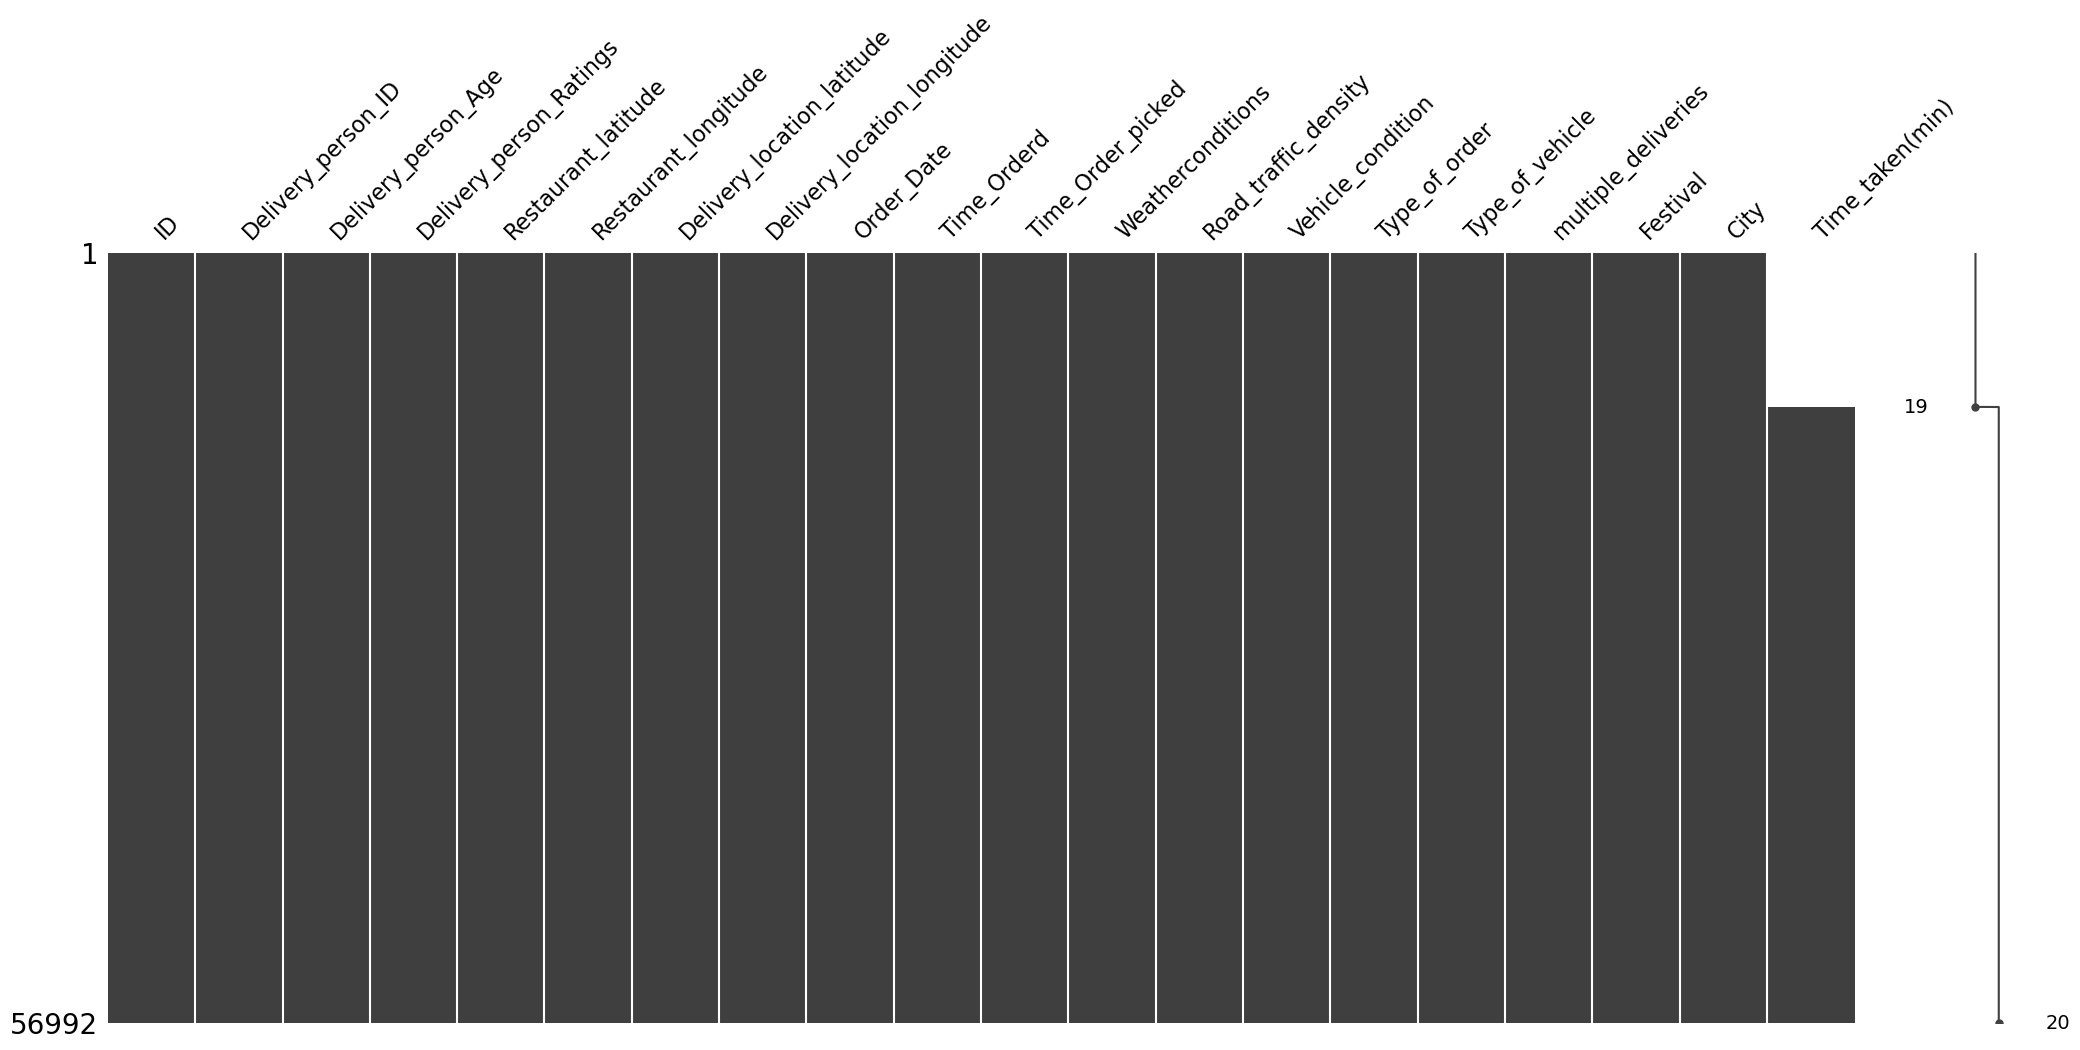

In [5]:
# Visualize missing values
import missingno as msno
msno.matrix(delivery)

In [6]:
fp = 'downloads/india_state.geojson.zip'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,105,IND,India,1,Andaman and Nicobar,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,None,None,State,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,None,Agence de la Frontire du Nord-Est(French-obsol...,State,State,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,None,None,State,State,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,None,None,State,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [39]:
merged = map_df.set_index('geometry').join(delivery.set_index('State'))

KeyError: "None of ['State'] are in the columns"

<Axes: >

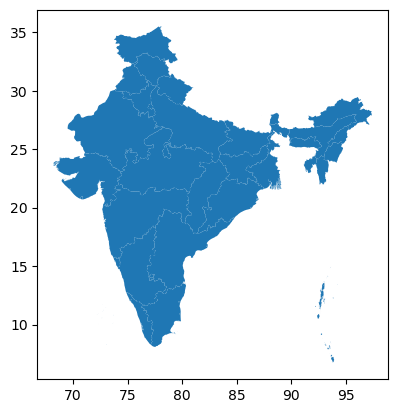

In [104]:
map_df.plot()

In [38]:
# import plotly.express as px

# fig= px.scatter_geo(delivery, lat=delivery['Delivery_location_latitude'], lon = delivery['Delivery_location_longitude'])
# fig.update_geos(fitbounds='locations', visible=False)
# fig2=px.scatter_geo(delivery, lat=delivery['Restaurant_latitude'], lon=delivery['Restaurant_longitude'])
# fig.show()

In [31]:
import json

In [33]:
indian_states=json.load(open('Downloads/states_india.geojson'))

C:\Users\hayle\AppData\Local\Temp\ipykernel_18320\1362198547.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



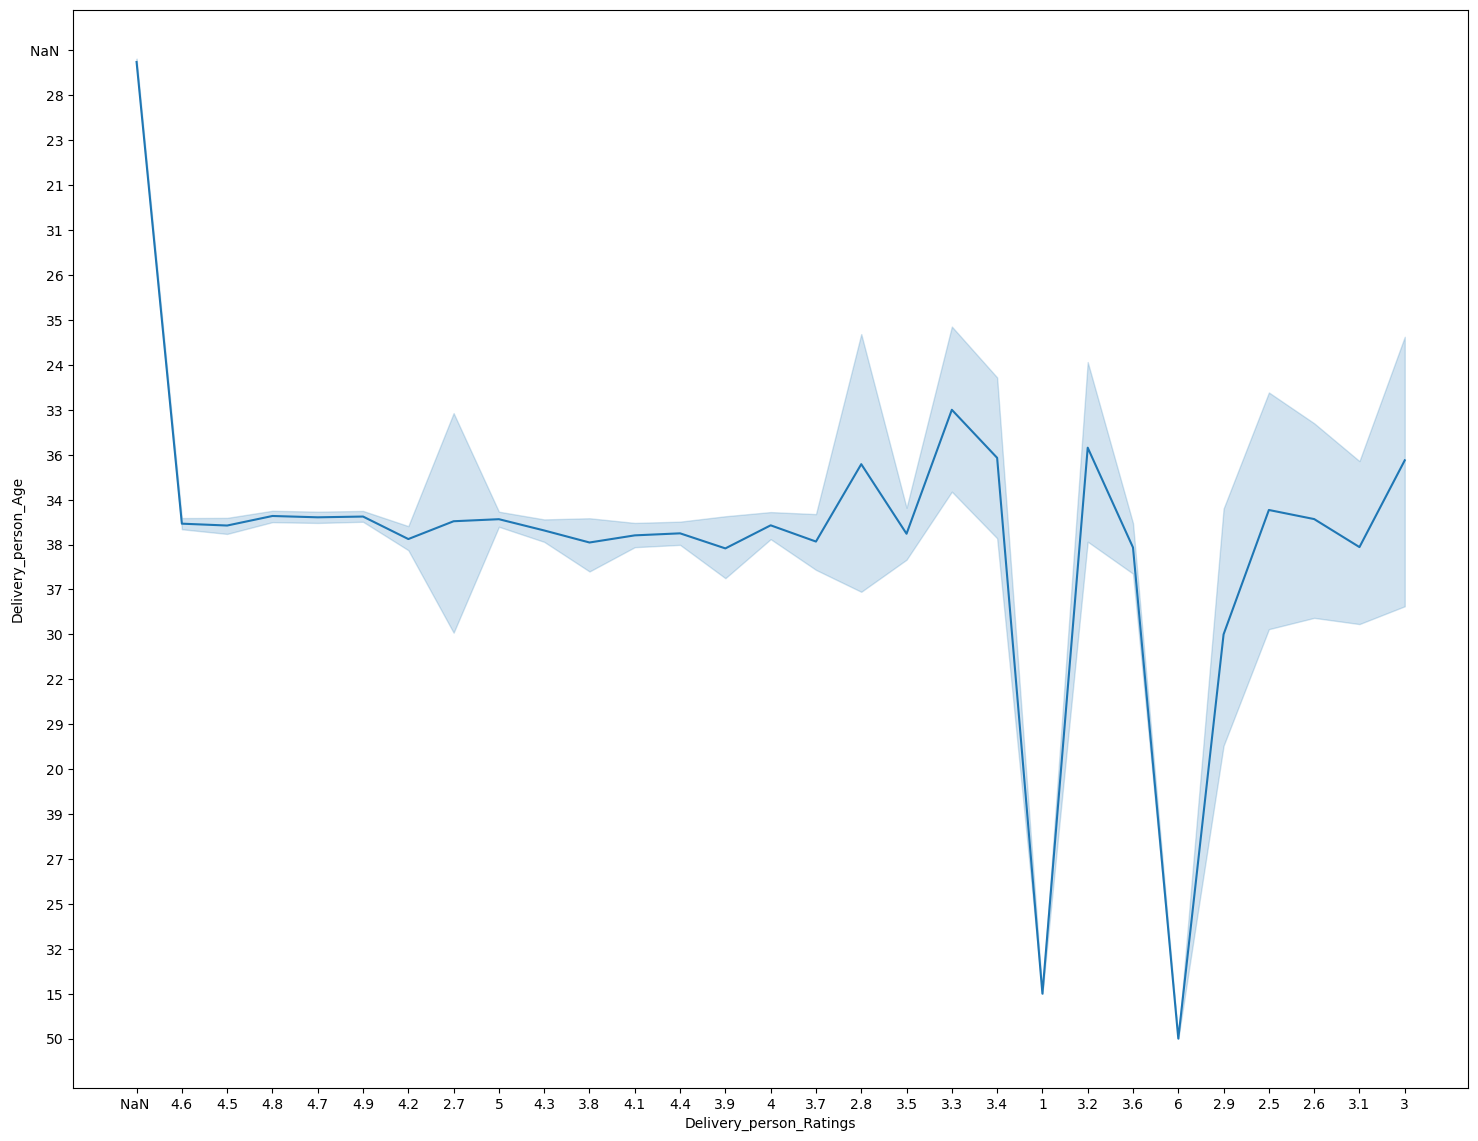

In [83]:

f, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(x=delivery['Delivery_person_Ratings'], y=delivery['Delivery_person_Age'] ,data=delivery, palette='magma')
plt.show()

In [43]:
# Specify the columns of interest
columns_of_interest = ['Restaurant_latitude', 'Restaurant_longitude']

# Create an empty DataFrame to store rows with 0 values
zero_values_df = pd.DataFrame()

# Loop through columns and rows
for column in columns_of_interest:
    # Use boolean indexing to select rows where the value is 0
    zero_rows = delivery[delivery[column] == 0]
    
    # Concatenate the selected rows to the new DataFrame
    zero_values_df = pd.concat([zero_values_df, zero_rows], ignore_index=True)

# Display the new DataFrame
zero_values_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4946,VADRES04DEL01,22,4.6,0.0,0.0,0.11,0.11,08-03-2022,23:40:00,23:50:00,conditions Windy,Low,1,Drinks,scooter,NaN,No,Urban,NaN
1,0x4598,RANCHIRES14DEL03,35,4.8,0.0,0.0,0.06,0.06,01-04-2022,22:15:00,22:25:00,conditions Sunny,Low,2,Snack,scooter,0,No,Metropolitian,NaN
2,0x9bb,VADRES16DEL01,23,4.4,0.0,0.0,0.01,0.01,24-03-2022,10:20:00,10:30:00,conditions Windy,Low,0,Snack,motorcycle,0,No,Metropolitian,NaN
3,0xd05f,DEHRES02DEL01,30,4.7,0.0,0.0,0.11,0.11,14-02-2022,21:55:00,22:00:00,conditions Cloudy,Jam,0,Snack,motorcycle,2,No,Metropolitian,NaN
4,0xcb17,ALHRES06DEL02,25,4.9,0.0,0.0,0.02,0.02,17-02-2022,10:00:00,10:15:00,conditions Sunny,Low,1,Buffet,scooter,0,No,Metropolitian,NaN


In [46]:
#  Drop these rows from the main dataframe because they make no sense

# Use boolean indexing to select rows where any of the specified columns have a value of 0
rows_to_drop = delivery[(delivery[columns_of_interest] == 0).any(axis=1)]

# Drop the selected rows from the original DataFrame
delivery = delivery.drop(rows_to_drop.index)

In [88]:
delivery['Delivery_person_Ratings'].isnull().sum()

0

In [93]:

delivery_copy=delivery.copy(deep=True)
delivery_copy['Delivery_person_Ratings']= pd.to_numeric(delivery['Delivery_person_Ratings'])
bins=[0,1,2,3,4,5]
labels=['0-1','1-2','2-3','3-4','4-5']
delivery_copy['Delivery_person_Ratings']=pd.cut(delivery_copy['Delivery_person_Ratings'], bins=bins, labels=labels)

TypeError: '<' not supported between instances of 'int' and 'str'

In [101]:
delivery['Delivery_person_Ratings'].dropna

<bound method Series.dropna of 0        NaN 
1         4.6
2         4.5
3         4.8
4         4.6
         ... 
56986     4.2
56987     4.8
56989     4.9
56990     4.7
56991     4.9
Name: Delivery_person_Ratings, Length: 52482, dtype: object>

In [112]:
# customize title
delivery['Delivery_person_Ratings'] = delivery['Delivery_person_Ratings'].astype('float')

def categorize_Ratings(Delivery_person_Ratings): 
    if Delivery_person_Ratings >0.1 and Delivery_person_Ratings <=1:
        return "Extremely Low"
    elif Delivery_person_Ratings>1 and Delivery_person_Ratings <=2.5:
        return "Low"
    elif Delivery_person_Ratings>2.5 and Delivery_person_Ratings <=4:
        return "Medium"
    else:
        return "High"
    
delivery['rating_level'] = delivery['Delivery_person_Ratings'].apply(categorize_Ratings)
delivery.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),age_level,rating_level
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Oldest,High
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,Young-Adults,High
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Young-Adults,High
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,Young-Adults,High
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,Older,High
5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,09:45:00,...,Low,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Young-Adults,High
6,0x3b9d,BANGRES19DEL02,23.0,4.8,12.914264,77.678400,12.934264,77.698400,01-04-2022,10:00:00,...,Low,2,Buffet,scooter,0,No,Urban,NaN,Young-Adults,High
7,0xdd42,KOLRES06DEL02,26.0,4.8,22.533662,88.366217,22.583662,88.416217,13-02-2022,18:00:00,...,Medium,0,Meal,motorcycle,1,No,Metropolitian,NaN,Young-Adults,High
8,0x872b,MYSRES05DEL03,35.0,4.9,12.323978,76.627961,12.413978,76.717961,02-03-2022,21:30:00,...,Jam,2,Snack,scooter,1,No,Metropolitian,NaN,Older,High
9,0x6001,HYDRES04DEL03,23.0,4.9,17.411028,78.329645,17.441028,78.359645,05-04-2022,20:45:00,...,Jam,1,Meal,motorcycle,0,No,Metropolitian,NaN,Young-Adults,High


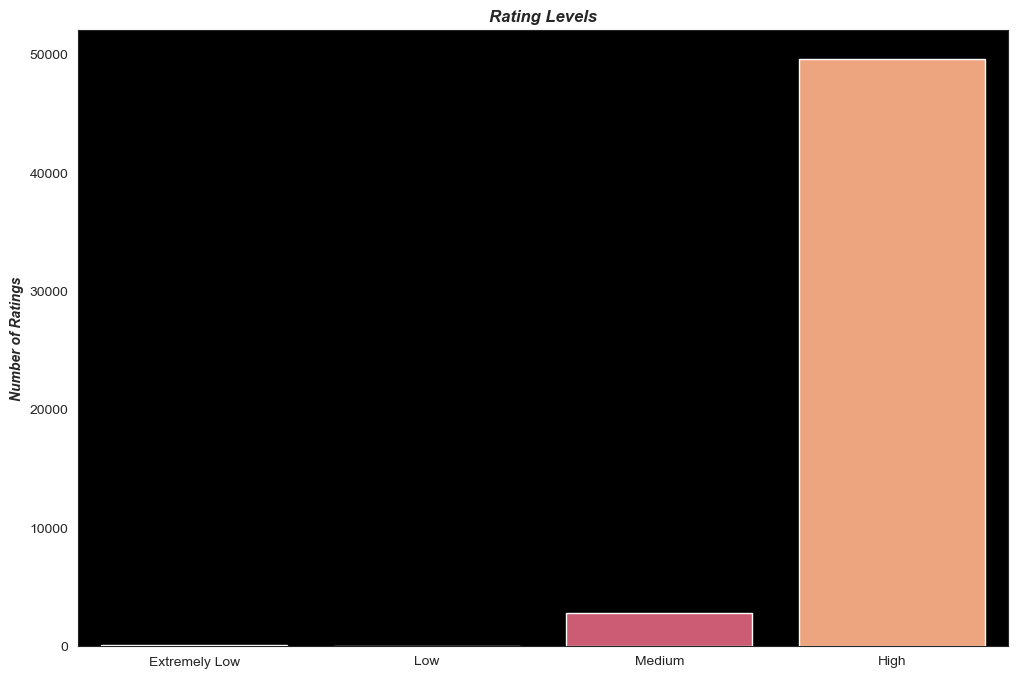

In [123]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

rating_order = ['Extremely Low', 'Low', 'Medium', 'High']

# plot of the different subjectivity levels
sns.countplot(x="rating_level", data=delivery, order=rating_order, palette="magma")
# customize title
ax.set_title('Rating Levels', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('', weight='bold', style='italic')
# customize y-axis label
ax.set_ylabel('Number of Ratings', weight='bold', style='italic')
# customize the y-axis label
ax.set_facecolor('black')
plt.show()

In [132]:
delivery['Delivery_person_Age'] = delivery['Delivery_person_Age'].astype('float')
def categorize_Ratings(Delivery_person_Age): 
    if Delivery_person_Age >15 and Delivery_person_Age <=20:
        return "15-18"
    elif Delivery_person_Age>20 and Delivery_person_Age <=29:
        return "20-29"
    elif Delivery_person_Age>29 and Delivery_person_Age <=50:
        return "30-40"
    else:
        return "41 and up"
delivery['age_level'] = delivery['Delivery_person_Age'].apply(categorize_Ratings)
delivery.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),age_level,rating_level
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,41 and up,High
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,20-29,High
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,20-29,High
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,20-29,High
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,30-40,High


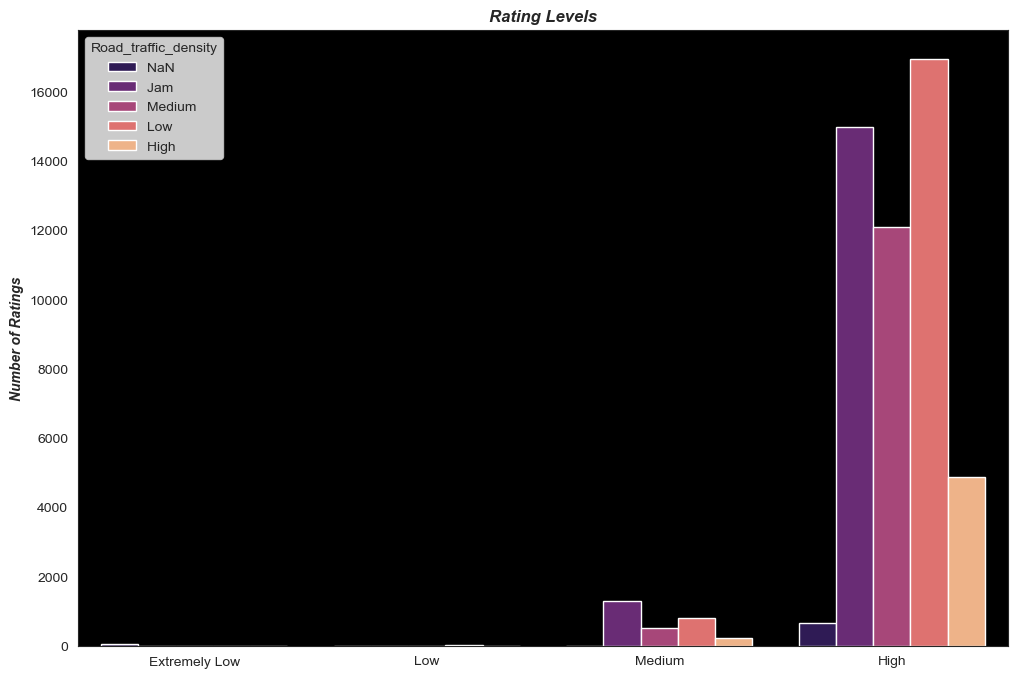

In [124]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

rating_order = ['Extremely Low', 'Low', 'Medium', 'High']

# plot of the different subjectivity levels
sns.countplot(x="rating_level", data=delivery, order=rating_order, palette="magma", hue='Road_traffic_density')
# customize title
ax.set_title('Rating Levels', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('', weight='bold', style='italic')
# customize y-axis label
ax.set_ylabel('Number of Ratings', weight='bold', style='italic')
# customize the y-axis label
ax.set_facecolor('black')
plt.show()

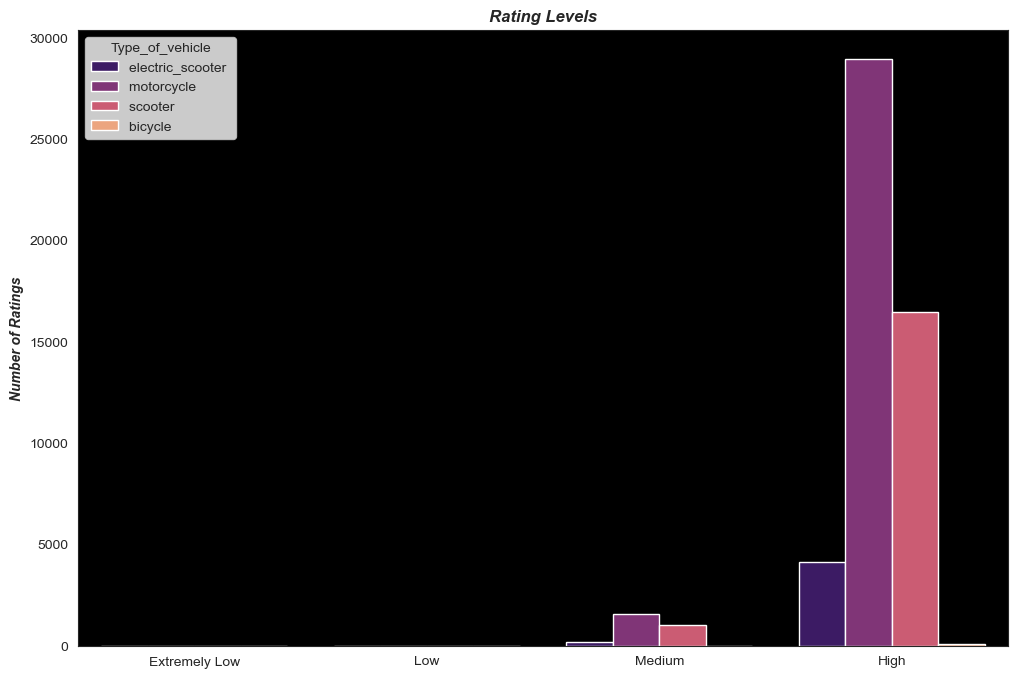

In [126]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

rating_order = ['Extremely Low', 'Low', 'Medium', 'High']

# plot of the different subjectivity levels
sns.countplot(x="rating_level", data=delivery, order=rating_order, palette="magma", hue='Type_of_vehicle')
# customize title
ax.set_title('Rating Levels', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('', weight='bold', style='italic')
# customize y-axis label
ax.set_ylabel('Number of Ratings', weight='bold', style='italic')
# customize the y-axis label
ax.set_facecolor('black')
plt.show()

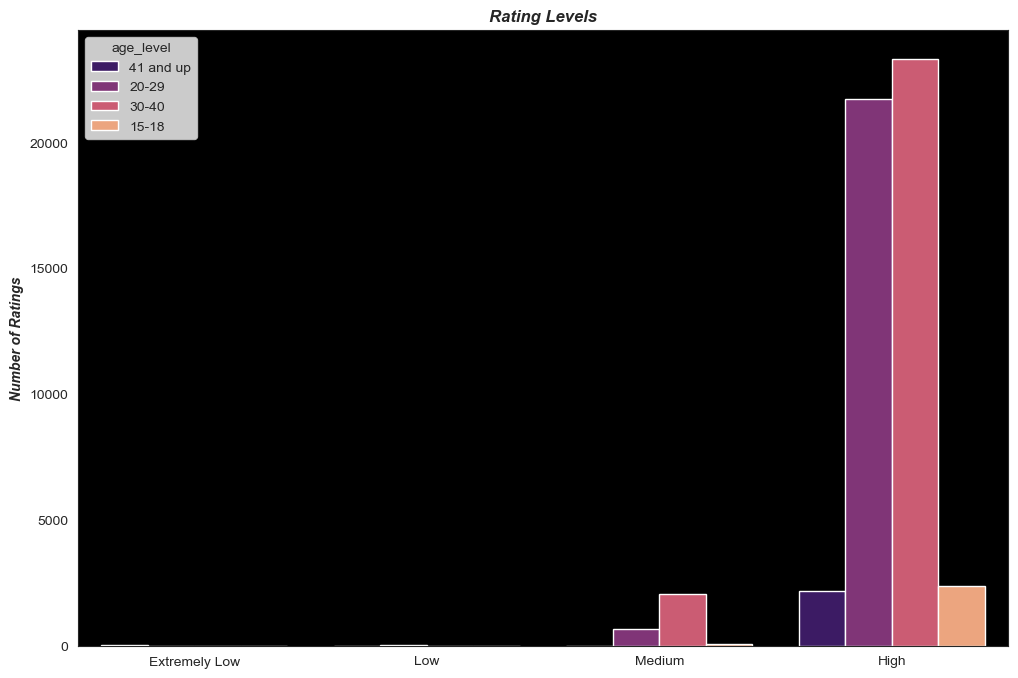

In [133]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

rating_order = ['Extremely Low', 'Low', 'Medium', 'High']

# plot of the different subjectivity levels
sns.countplot(x="rating_level", data=delivery, order=rating_order, palette="magma", hue='age_level')
# customize title
ax.set_title('Rating Levels', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('', weight='bold', style='italic')
# customize y-axis label
ax.set_ylabel('Number of Ratings', weight='bold', style='italic')
# customize the y-axis label
ax.set_facecolor('black')
plt.show()

In [131]:
delivery.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,50314.000000,50259.000000,52482.000000,52482.000000,52482.000000,52482.000000,52482.000000
mean,29.553146,4.632450,18.497989,76.303081,18.983309,76.984090,1.023456
std,5.807882,0.337308,6.760543,10.335506,5.472428,3.498432,0.838860
min,15.000000,1.000000,-30.905562,-88.400467,9.967144,72.778726,0.000000
25%,25.000000,4.500000,12.980410,73.897902,13.066286,73.940547,0.000000
50%,30.000000,4.700000,19.003517,76.617889,19.124049,76.662620,1.000000
75%,35.000000,4.900000,22.750040,78.347554,22.821226,78.405467,2.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000
